In [8]:
## importing modules used in this project
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [9]:
## initializing the dataset and segregate into Training and Test set
data=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=data.load_data()

In [10]:
## Data Preprocessing
## Checking out the shapes involved in dataset
print ("Shape of x_train: {}".format(x_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of x_test: {}".format(x_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [11]:
## Normalizing the data
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

## Declare the model
model=tf.keras.models.Sequential()

## Declare the Layers
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

In [12]:
## Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [13]:
## Training the model
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2588 - accuracy: 0.9238
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1063 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0714 - accuracy: 0.9774


In [14]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9656
0.9656000137329102
0.11275254935026169


1/1 [==============================] - 0s 59ms/step
----------------
The Predicted O/P is 2
----------------


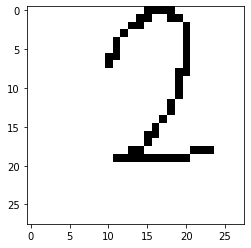

1/1 [==============================] - 0s 17ms/step
----------------
The Predicted O/P is 1
----------------


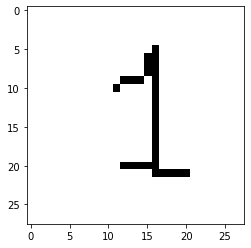

1/1 [==============================] - 0s 17ms/step
----------------
The Predicted O/P is 1
----------------


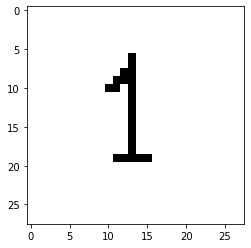

1/1 [==============================] - 0s 19ms/step
----------------
The Predicted O/P is 4
----------------


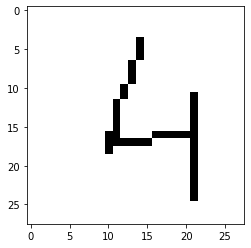

1/1 [==============================] - 0s 20ms/step
----------------
The Predicted O/P is 9
----------------


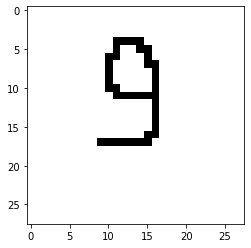

In [15]:
## Processing the Images
for x in range(1,6):
   img=cv.imread(f'{x}.png')[:,:,0]
   img=np.invert(np.array([img]))

## Prediction
   prediction=model.predict(img)
   print("----------------")
   print("The Predicted O/P is",np.argmax(prediction))
   print("----------------")
   plt.imshow(img[0],cmap=plt.cm.binary)
   plt.show()